<a href="https://colab.research.google.com/github/AlexGrunt/advanced_ml/blob/main/%5B3%5Dsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продвинутое машинное обучение: 
# Домашнее задание 3

Третье домашнее задание посвящено достаточно простой, но, надеюсь, интересной задаче, в которой потребуется творчески применить методы сэмплирования. Как и раньше, в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Как всегда, любые комментарии, новые идеи и рассуждения на тему категорически приветствуются. 
В этом небольшом домашнем задании мы попробуем улучшить метод Шерлока Холмса. Как известно, в рассказе The Adventure of the Dancing Men великий сыщик расшифровал загадочные письмена, которые выглядели примерно так:

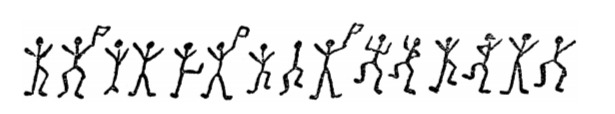

Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее.
В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски:
https://www.dropbox.com/s/k23enjvr3fb40o5/corpora.zip 

In [1]:
!unzip corpora.zip 

Archive:  corpora.zip
  inflating: AnnaKarenina.txt        
  inflating: WarAndPeace.txt         
  inflating: WarAndPeaceEng.txt      


## 1. Реализуйте базовый частотный метод по Шерлоку Холмсу:


1.   Подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
2.   возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
3. расшифруйте их таким частотным методом.







In [2]:
import string

from collections import defaultdict
from itertools import zip_longest
from random import shuffle
from typing import List

In [3]:
ENGLISH_ALPHABET = set((string.ascii_lowercase + ' '))
RUSSIAN_ALPHABET = set(chr(i) for i in range(ord('а'), ord('я') + 1)).union({' '})

def letter_histogram(filepath: str, english: bool):
    histogram = defaultdict(int)
    alphabet = ENGLISH_ALPHABET if english else RUSSIAN_ALPHABET
    with open(filepath, 'r') as file:
        for line in file.readlines():
            for letter in line.lower():
                if letter in alphabet:
                    histogram[letter] += 1
    return histogram

In [4]:
rus_histogram = letter_histogram("WarAndPeace.txt", False)
eng_histogram = letter_histogram("WarAndPeaceEng.txt", True)

In [5]:
russian_test_texts = [
    """
    И скучно и грустно, и некому руку подать
    В минуту душевной невзгоды…
    Желанья!.. Что пользы напрасно и вечно желать?..
    А годы проходят — все лучшие годы!

    Любить… Но кого же?.. На время — не стоит труда,
    А вечно любить невозможно.
    В себя ли заглянешь? — там прошлого нет и следа:
    И радость, и муки, и всё там ничтожно…

    Что страсти? — ведь рано иль поздно их сладкий недуг
    Исчезнет при слове рассудка;
    И жизнь, как посмотришь с холодным вниманьем вокруг, –
    Такая пустая и глупая шутка…
    """,
    """
    В.Г. Белинский писал об этом стихотворении: «И скучно и грустно» из всех пьес Лермонтова обратила на себя особенную неприязнь старого поколения. 
    Странные люди! Им все кажется, что поэзия должна выдумывать, 
    а не быть жрицею истины, тешить побрякушками, а не греметь правдою!» 
    """,
    """
    При возникновении теоремы Байеса вероятности, используемые в теореме, подвергались целому ряду вероятностных интерпретаций. В одной из таких интерпретаций говорилось, 
    что вывод формулы напрямую связан с применением особого подхода к статистическому анализу. 
    Если использовать байесовскую интерпретацию вероятности, то теорема показывает, как личный уровень доверия может кардинально измениться вследствие количества наступивших событий.
    """,
]

In [6]:
english_test_texts = [
    """
    One of the many applications of Bayes' theorem is Bayesian inference, a particular approach to statistical inference. 
    When applied, the probabilities involved in the theorem may have different probability interpretations. 
    With Bayesian probability interpretation, the theorem expresses how a degree of belief, expressed as a probability, should rationally change to account for the availability of related evidence.
    """,
    """
    By modern standards, we should refer to the Bayes–Price rule. 
    Price discovered Bayes's work, recognized its importance, corrected it, contributed to the article, and found a use for it. 
    The modern convention of employing Bayes's name alone is unfair but so entrenched that anything else makes little sense.
    """,
    """
    Existence and uniqueness of the needed conditional expectation is a consequence of the Radon-Nikodym theorem.
    This was formulated by Kolmogorov in his famous book from 1933. 
    Kolmogorov underlines the importance of conditional probability by writing 'I wish to call attention to ... and especially the theory of conditional probabilities and conditional expectations ...' in the Preface.
    """,
]

In [7]:
def shuffle_encode(text: str, alphabet: set) -> str:
    shuffled_alphabet = list(alphabet).copy()
    shuffle(shuffled_alphabet)
    shuffled_mapping = {char: map_char for char, map_char in zip(list(alphabet), shuffled_alphabet)}
    text_list = list(text.lower())

    for i, char in enumerate(text_list):
        if char in shuffled_mapping:
            text_list[i] = shuffled_mapping[char]

    return ''.join(text_list)

def encode_all(texts: List[str], alphabet: set) -> List[str]:
    return [shuffle_encode(text.lower(), alphabet) for text in texts]

def text_histogram(text: str, alphabet: set) -> dict:
    histogram = defaultdict(int)
    for char in text:
        if char in alphabet:
            histogram[char] += 1

    return histogram
    
def get_sorted_keys(histogram: dict) -> list:
    return [x[0] for x in sorted(histogram.items(), key=lambda x: x[1], reverse=True)]

def frequency_decode(encoded_text: str, lang_histogram: dict, alphabet: set) -> str:
    encoded_histogram = text_histogram(encoded_text, alphabet)
    
    lang_keys = get_sorted_keys(lang_histogram)
    encoded_keys = get_sorted_keys(encoded_histogram)
    key_mapping = {}

    for encoded_key, lang_key  in zip(encoded_keys, lang_keys):
        key_mapping[encoded_key] = lang_key

    encoded_list = list(encoded_text)

    for i, char in enumerate(encoded_list):
        if char in key_mapping:
            encoded_list[i] = key_mapping[char]

    return ''.join(encoded_list)

def decode_all(encoded_texts: List[str], lang_histogram: dict, alphabet:set) -> List[str]:
    return [frequency_decode(text, lang_histogram, alphabet) for text in encoded_texts]

Для русского языка:

In [8]:
rus_encoded = encode_all(russian_test_texts, RUSSIAN_ALPHABET)
rus_decoded = decode_all(rus_encoded, rus_histogram, RUSSIAN_ALPHABET)

for decoded_text, encoded_text, original_text in zip(rus_decoded, rus_encoded, russian_test_texts):
    print("Оригинальный текст:")
    print(original_text)
    print("Закодированный перестановкой текст:")
    print(encoded_text)
    print("Декодированный текст:")
    print(decoded_text)
    print('=' * 20)

Оригинальный текст:

    И скучно и грустно, и некому руку подать
    В минуту душевной невзгоды…
    Желанья!.. Что пользы напрасно и вечно желать?..
    А годы проходят — все лучшие годы!

    Любить… Но кого же?.. На время — не стоит труда,
    А вечно любить невозможно.
    В себя ли заглянешь? — там прошлого нет и следа:
    И радость, и муки, и всё там ничтожно…

    Что страсти? — ведь рано иль поздно их сладкий недуг
    Исчезнет при слове рассудка;
    И жизнь, как посмотришь с холодным вниманьем вокруг, –
    Такая пустая и глупая шутка…
    
Закодированный перестановкой текст:

ииииыийсфчхжиыинлфйдхж,иыихясжъфилфсфиржшаду
ииииэиъыхфдфишфбяэхжцихяэенжшп…
ииииоягахую!..ичджиржгуепихарлайхжиыиэячхжиоягаду?..
ииииаинжшпирлжмжшюди—иэйяигфчбыяинжшп!

иииигщзыду…ихжисжнжиоя?..ихаиэляъюи—ихяийджыдидлфша,
ииииаиэячхжигщзыдуихяэжеъжохж.
ииииэийязюигыиеангюхябу?и—идаъирлжбгжнжихядиыийгяша:
ииииыилашжйду,иыиъфсы,иыиэйёидаъихычджохж…

иииичджийдлайды?и—иэяшуилахжиыгуиржешхжиымийгашсыцихя

Для английского языка:

In [9]:
eng_encoded = encode_all(english_test_texts, ENGLISH_ALPHABET)
eng_decoded = decode_all(eng_encoded, eng_histogram, ENGLISH_ALPHABET)

for decoded_text, encoded_text, original_text in zip(eng_decoded, eng_encoded, english_test_texts):
    print("Оригинальный текст:")
    print(original_text)
    print("Закодированный перестановкой текст")
    print(encoded_text)
    print("Декодированный текст:")
    print(decoded_text)
    print('=' * 20)

Оригинальный текст:

    One of the many applications of Bayes' theorem is Bayesian inference, a particular approach to statistical inference. 
    When applied, the probabilities involved in the theorem may have different probability interpretations. 
    With Bayesian probability interpretation, the theorem expresses how a degree of belief, expressed as a probability, should rationally change to account for the availability of related evidence.
    
Закодированный перестановкой текст

ccccqercqbctircufeacfnnvpoftpqekcqbcgfark'ctirqyrucpkcgfarkpfecpebryreor,cfcnfytpozvfycfnnyqfoictqcktftpktpofvcpebryreor.c
cccchirecfnnvpr ,ctircnyqgfgpvptprkcpejqvjr cpectirctirqyrucufacifjrc pbbryretcnyqgfgpvptacpetrynyrtftpqek.c
cccchpticgfarkpfecnyqgfgpvptacpetrynyrtftpqe,ctirctirqyrucrlnyrkkrkciqhcfc rmyrrcqbcgrvprb,crlnyrkkr cfkcfcnyqgfgpvpta,ckiqzv cyftpqefvvacoifemrctqcfooqzetcbqyctircfjfpvfgpvptacqbcyrvftr crjp reor.
cccc
Декодированный текст:

    nhe nm ode gthc tllsawtoanhr nm utcer' odenieg

Как видно, при таком декодировании ничего не выходит. Возможно это связано с чересчур маленькой длиной рассматриваемых текстов. Посмотрим, какие результаты получатся с другими методами.

## 2. Биграммы
Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:

1. подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
2. проведите тестирование аналогично п.1, но при помощи биграмм.





In [10]:
def normalize_text(text: str, alphabet: set) -> str:
    res = []
    text = ' '.join(text.split(' ')).lower()
    for char in text:
        if char in alphabet:
            res.append(char)
    return ''.join(res)

def text_bigram_histogram(text: str, alphabet: set) -> dict:
    histogram = defaultdict(int)
    text = normalize_text(text, alphabet)
    end_window = 1
    while end_window < len(text):
        histogram[text[end_window - 1: end_window + 1]] += 1
        end_window += 1
    return histogram

def decode_bigram(text: str, bigram_histogram: dict, alphabet: set) -> str:
    normalized_text = normalize_text(text, alphabet)
    text_histogram = text_bigram_histogram(text, alphabet)
    from_pos, to_pos = 0, 1

    lang_keys = get_sorted_keys(bigram_histogram)
    text_keys = get_sorted_keys(text_histogram)
    mapping = {text_bigram: lang_bigram for text_bigram, lang_bigram in zip(text_keys, lang_keys)}
    decoded_text = []

    while to_pos < len(normalized_text):
        text_bigram = normalized_text[from_pos: to_pos + 1]
        if text_bigram in mapping:
            decoded_text.append(mapping[normalized_text[from_pos: to_pos + 1]])
        else:
            decoded_text.append(text_bigram)
        from_pos, to_pos = from_pos + 2, to_pos + 2

    if from_pos < len(normalized_text):
        decoded_text[-1] = decoded_text[-1][0] + mapping[normalized_text[from_pos - 1: from_pos + 1]]

    return ''.join(decoded_text)

def decode_bigram_all(texts: List[str], bigram_histogram: dict, alphabet: set) -> List[str]:
    return [decode_bigram(text, bigram_histogram, alphabet) for text in texts]


def get_lang_bigram_histogram(path: str, alphabet: str):
    with open(path, 'r') as file:
        lang = file.read()

        return text_bigram_histogram(lang, alphabet)

# some tests
with open('WarAndPeace.txt', 'r') as file:
    war_and_peace = file.read()
lang_histogram = get_lang_bigram_histogram("WarAndPeace.txt", RUSSIAN_ALPHABET)
assert normalize_text(war_and_peace, RUSSIAN_ALPHABET) == decode_bigram(shuffle_encode(war_and_peace, RUSSIAN_ALPHABET), lang_histogram, RUSSIAN_ALPHABET)

with open('WarAndPeaceEng.txt', 'r') as file:
    war_and_peace_eng = file.read()
lang_histogram_english = get_lang_bigram_histogram("WarAndPeaceEng.txt", ENGLISH_ALPHABET)
assert normalize_text(war_and_peace_eng, ENGLISH_ALPHABET) == decode_bigram(shuffle_encode(war_and_peace_eng, ENGLISH_ALPHABET), lang_histogram_english, ENGLISH_ALPHABET)

In [11]:
eng_encoded = [normalize_text(text, ENGLISH_ALPHABET) for text in encode_all(english_test_texts, ENGLISH_ALPHABET)]
eng_decoded = decode_bigram_all(eng_encoded, lang_histogram_english, ENGLISH_ALPHABET)

for decoded_text, encoded_text, original_text in zip(eng_decoded, eng_encoded, english_test_texts):
    print("Предобработанный оригинальный текст:")
    print(normalize_text(original_text, ENGLISH_ALPHABET))
    print("Закодированный перестановкой текст")
    print(encoded_text)
    print("Декодированный текст:")
    print(decoded_text)
    print('=' * 20)

Предобработанный оригинальный текст:
    one of the many applications of bayes theorem is bayesian inference a particular approach to statistical inference     when applied the probabilities involved in the theorem may have different probability interpretations     with bayesian probability interpretation the theorem expresses how a degree of belief expressed as a probability should rationally change to account for the availability of related evidence    
Закодированный перестановкой текст
qqqqnyzqngqhozqvkyxqkdduwbkhwnypqngqikxzpqhoznlzvqwpqikxzpwkyqwygzlzybzqkqdklhwbtuklqkddlnkboqhnqphkhwphwbkuqwygzlzybzqqqqqmozyqkdduwz qhozqdlnikiwuwhwzpqwyanuaz qwyqhozqhoznlzvqvkxqokazq wggzlzyhqdlnikiwuwhxqwyhzldlzhkhwnypqqqqqmwhoqikxzpwkyqdlnikiwuwhxqwyhzldlzhkhwnyqhozqhoznlzvqzrdlzppzpqonmqkq zelzzqngqizuwzgqzrdlzppz qkpqkqdlnikiwuwhxqpontu qlkhwnykuuxqbokyezqhnqkbbntyhqgnlqhozqkakwukiwuwhxqngqlzukhz qzaw zybzqqqq
Декодированный текст:
e e at touth ati bansth arreishor y  sf erd ntheseriitasn  r

In [12]:
rus_encoded = [normalize_text(text, RUSSIAN_ALPHABET) for text in encode_all(russian_test_texts, RUSSIAN_ALPHABET)]
rus_decoded = decode_bigram_all(rus_encoded, lang_histogram, RUSSIAN_ALPHABET)

for decoded_text, encoded_text, original_text in zip(rus_decoded, rus_encoded, russian_test_texts):
    print("Предобработанный оригинальный текст:")
    print(normalize_text(original_text, RUSSIAN_ALPHABET))
    print("Закодированный перестановкой текст")
    print(encoded_text)
    print("Декодированный текст:")
    print(decoded_text)
    print('=' * 20)

Предобработанный оригинальный текст:
    и скучно и грустно и некому руку подать    в минуту душевной невзгоды    желанья что пользы напрасно и вечно желать    а годы проходят  все лучшие годы    любить но кого же на время  не стоит труда    а вечно любить невозможно    в себя ли заглянешь  там прошлого нет и следа    и радость и муки и вс там ничтожно    что страсти  ведь рано иль поздно их сладкий недуг    исчезнет при слове рассудка    и жизнь как посмотришь с холодным вниманьем вокруг     такая пустая и глупая шутка    
Закодированный перестановкой текст
ррррпрбйхчоурпрсыхбаоурпроейулхрыхйхръувфажррррэрлпохахрвхьеэоу роеэисувюррррцешфожзрчауръушжиюрофъыфбоурпрэечоурцешфажррррфрсувюръыунувзаррэбершхчьперсувюрррршкгпажроурйусурцерофрэыелзрроербаупараыхвфррррфрэечоуршкгпажроеэуилуцоуррррэрбегзршприфсшзоеьжррафлръыуьшусуроеарпрбшевфррррпрыфвубажрпрлхйпрпрэбрафлропчауцоуррррчаурбаыфбапррэевжрыфоурпшжръуивоурпнрбшфвйп роевхсррррпбчеиоеаръыпрбшуэерыфббхвйфррррпрцпиожрйфйръублуаыпьжрбрнушу

Выглядит еще хуже, чем с одиночными буквами, так как теперь не сохраняется даже длина слов, узнать первоначальный текст невозможно. Это, очевидно, происходит по причине бОльшего разнообразия биграм по сравнению с одиночными буквами. Для некоторых тестовых примеров число возможных биграмм превосходит число всевозможных биграмм текста, из-за этого результат получается очень шумный.

Имеет смысл сравниваться на текстах сравнимой с обучающим корпусом длины. Попробуем преобразовать роман "Анна Каренина".

In [13]:
with open('AnnaKarenina.txt', 'r') as file:
    anna_karenina = file.read()
print(f"Длина романа в символах: {len(anna_karenina)}")
print(normalize_text(anna_karenina[:200], RUSSIAN_ALPHABET))
print(decode_bigram(shuffle_encode(anna_karenina, RUSSIAN_ALPHABET), lang_histogram, RUSSIAN_ALPHABET)[:200])

Длина романа в символах: 1813200
анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по
ат калхо бжеа дажея д икуммашиие бмитнмооматкатиэна  нош нне слюжежиаг о иинылротлреляю олрвасру вде пму изакни деыде ношеулм босс км бодвалба з онаибесявдией петке сбыму изаел  ли детотимо зоига о ве


Кажется, что даже этого не достаточно, такое чувство, что размер корпуса, на котором мы считаем частоты биграм недостаточен для этого метода.

## 3. Markov Chain Monte-Carlo
Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:


1.   предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
2.   реализуйте и протестируйте его, убедитесь, что результаты улучшились.

Мы знаем, что текст, который мы расшифровываем получен с помощью перестановки букв исходного алфавита:
$\text{encoded} = \sigma(\text{text})$

**Задача:** Найти перестановку $\sigma$ максимизирующую правдоподобие
$$\sigma: P(\text{text} | \sigma) \to_{\sigma} \max$$

**Алгоритм: [Метрополиса-Гастингса]**:


1.   Стартуем со случайного алфавита: $\sigma_0$. Затем выполняем $N$ раз шаги 2-4.
2.   Равновероятно выбираем пару $(a, b)$ различных символов алфавита и меняем их местами: $\sigma_{i + 1} = \sigma_i \circ (ab)$.
3. Считаем отношение правдоподобий
$$
a = \frac{P(text | \sigma_{i + 1})}{P(text | \sigma_i)}
$$
При этом считать правдоподобие мы будем на основе статистики $n$-грамм.
4. Принимаем эту перестановку с вероятностью $p=min(1, a)$.





In [144]:
import numpy as np

from random import sample, random
from tqdm import tqdm

from multiprocessing import Pool
from itertools import repeat

In [128]:
class MCMCTransformer:
    def __init__(self, alphabet: set, k_grams=2, max_iter=100):
        self.n = k_grams
        self.max_iter = max_iter
        self.alphabet = alphabet
        self.train_histogram = None

    def get_text_histogram(self, text: str):
        histogram = defaultdict(int)
        end_window = self.n

        while end_window <= len(text):
            histogram[text[end_window - self.n: end_window]] += 1
            end_window += 1

        count = sum(histogram.values())
        for gram in histogram:
            histogram[gram] = histogram[gram] / count

        return histogram

    def fit(self, train_text: str):
        normalized_text = normalize_text(train_text, self.alphabet)
        self.train_histogram = self.get_text_histogram(normalized_text)
        
        return self

    def translate(self, text: str, mapping: dict):
        translated = []
        for letter in text:
            translated.append(mapping[letter])

        return ''.join(translated)

    def log_score(self, test_text: dict):
        score = 0
        end_window = self.n

        while end_window <= len(test_text):
            score += np.log(self.train_histogram.get(test_text[end_window - self.n: end_window], 1 / len(test_text)))
            end_window += 1

        return score

    def transform(self, test_text: str):
        test_alphabet = np.unique(list(test_text))
        test_alphabet = test_alphabet
        train_alphabet = list(self.alphabet)
        shuffle(train_alphabet)
        test_to_train = {test_letter:train_letter  for train_letter, test_letter in zip(train_alphabet, test_alphabet)}
        prev_score = self.log_score(self.translate(test_text, test_to_train))

        acceptance_count = 0

        for _ in tqdm(range(self.max_iter)):
            i, j = sample(np.arange(len(train_alphabet)).tolist(), 2)
            train_alphabet[i], train_alphabet[j] = train_alphabet[j], train_alphabet[i]

            test_to_train_new = {test_letter:train_letter  for train_letter, test_letter in zip(train_alphabet, test_alphabet)}
            score = self.log_score(self.translate(test_text, test_to_train_new))

            accept_proba = min(1, np.exp(score - prev_score))
            
            if random() < accept_proba:
                acceptance_count += 1
                prev_score = score
                test_to_train = test_to_train_new
            else:
                train_alphabet[i], train_alphabet[j] = train_alphabet[j], train_alphabet[i]

        print(f"\nAcceptance ratio: {acceptance_count / self.max_iter}")

        return self.translate(test_text, test_to_train)

In [155]:
len(eng_encoded[0])

422

In [161]:
mcmc = MCMCTransformer(ENGLISH_ALPHABET, max_iter=100_000).fit(war_and_peace_eng)

eng_encoded = [normalize_text(text, ENGLISH_ALPHABET) for text in encode_all(english_test_texts, ENGLISH_ALPHABET)]
eng_decoded = [mcmc.transform(text) for text in eng_encoded]

for decoded_text, encoded_text, original_text in zip(eng_decoded, eng_encoded, english_test_texts):
    print("Предобработанный оригинальный текст:")
    print(normalize_text(original_text, ENGLISH_ALPHABET))
    print("Закодированный перестановкой текст")
    print(encoded_text)
    print("Декодированный текст:")
    print(decoded_text)
    print('=' * 20)

100%|██████████| 100000/100000 [01:17<00:00, 1292.88it/s]



Acceptance ratio: 0.02488


100%|██████████| 100000/100000 [01:06<00:00, 1497.92it/s]



Acceptance ratio: 0.02097


100%|██████████| 100000/100000 [01:18<00:00, 1269.16it/s]


Acceptance ratio: 0.00895
Предобработанный оригинальный текст:
    one of the many applications of bayes theorem is bayesian inference a particular approach to statistical inference     when applied the probabilities involved in the theorem may have different probability interpretations     with bayesian probability interpretation the theorem expresses how a degree of belief expressed as a probability should rationally change to account for the availability of related evidence    
Закодированный перестановкой текст
qqqqibmqikqaxmqdnbrqnggozfnazibcqikqunrmcqaxmi mdqzcqunrmcznbqzbkm mbfmqnqgn azfpon qngg infxqaiqcanazcazfnoqzbkm mbfmqqqqqjxmbqnggozmhqaxmqg iunuzozazmcqzbsiosmhqzbqaxmqaxmi mdqdnrqxnsmqhzkkm mbaqg iunuzozarqzbam g manazibcqqqqqjzaxqunrmcznbqg iunuzozarqzbam g manazibqaxmqaxmi mdqmwg mccmcqxijqnqhml mmqikqumozmkqmwg mccmhqncqnqg iunuzozarqcxipohq nazibnoorqfxnblmqaiqnffipbaqki qaxmqnsnzonuzozarqikq monamhqmszhmbfmqqqq
Декодированный текст:
    one of the many applications 

In [163]:
mcmc = MCMCTransformer(RUSSIAN_ALPHABET, max_iter=100_000).fit(war_and_peace)

rus_encoded = [normalize_text(text, RUSSIAN_ALPHABET) for text in encode_all(russian_test_texts, RUSSIAN_ALPHABET)]
rus_decoded = [mcmc.transform(text) for text in rus_encoded]

for decoded_text, encoded_text, original_text in zip(rus_decoded, rus_encoded, russian_test_texts):
    print("Предобработанный оригинальный текст:")
    print(normalize_text(original_text, RUSSIAN_ALPHABET))
    print("Закодированный перестановкой текст")
    print(encoded_text)
    print("Декодированный текст:")
    print(decoded_text)
    print('=' * 20)

100%|██████████| 100000/100000 [01:39<00:00, 1007.00it/s]



Acceptance ratio: 0.02307


100%|██████████| 100000/100000 [00:58<00:00, 1714.60it/s]



Acceptance ratio: 0.01478


100%|██████████| 100000/100000 [01:28<00:00, 1128.58it/s]


Acceptance ratio: 0.01369
Предобработанный оригинальный текст:
    и скучно и грустно и некому руку подать    в минуту душевной невзгоды    желанья что пользы напрасно и вечно желать    а годы проходят  все лучшие годы    любить но кого же на время  не стоит труда    а вечно любить невозможно    в себя ли заглянешь  там прошлого нет и следа    и радость и муки и вс там ничтожно    что страсти  ведь рано иль поздно их сладкий недуг    исчезнет при слове рассудка    и жизнь как посмотришь с холодным вниманьем вокруг     такая пустая и глупая шутка    
Закодированный перестановкой текст
оооочомкбфшдочоахбмюшдочошъкдебохбкботдщзюэоооопоечшбюбощбвъпшдлошъпйадщцооооръызшэжофюдотдыэйцошзтхзмшдочопъфшдоръызюэоооозоадщцотхдудщжюоопмъоыбфвчъоадщцооооынячюэошдокдадоръошзопхъежоошъомюдчюоюхбщзоооозопъфшдоынячюэошъпдйедршдоооопомъяжоычойзаыжшъвэооюзеотхдвыдадошъюочомыъщзоооочохзщдмюэочоебкчочопмоюзеошчфюдршдоооофюдомюхзмючоопъщэохзшдочыэотдйщшдочуомызщкчлошъщбаоооочмфъйшъюотхчомыдпъохзммбщкзоооочо

Результат уже сильно лучше, чем у частотных методов. В среднем, за 100_000 итераций один из трех текстов полностью расшифровывается для отдельных языков. Очевидно, для большего числа итераций (напр. 1_000_000) мы получили бы лучшую картину. 

Кроме того, видно, что очень много изменений мы отвергаем (около 98%), что тоже очень сильно влияет на сходимость. Для ускорения сходимости можно было бы поработать над алгоритмом выбора соседей (напр. не рассматривать маппинги, которые уже были обсчитаны).

## 4. Расшифровка данного в задании сообщения

In [166]:
test_text = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

In [168]:
mcmc = MCMCTransformer(RUSSIAN_ALPHABET, max_iter=1_000_000).fit(war_and_peace)

print("Russian translate:")
print(mcmc.transform(test_text))

Russian translate:


100%|██████████| 1000000/1000000 [08:00<00:00, 2081.53it/s]


Acceptance ratio: 0.031712
если вы вимите ноъкальныя или подти ноъкальныя терст у щтого соочхений ротоъыя легро пъодитать сроъее всего вы все смелали пъавильно и полудите карсикальныя чалл за послемнее детвеътое замание руъса эотй ронедно й нидего не очехаш




> Если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать, скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю



## 5. Использование триграмм

In [169]:
mcmc = MCMCTransformer(ENGLISH_ALPHABET, max_iter=100_000, k_grams=3).fit(war_and_peace_eng)

eng_encoded = [normalize_text(text, ENGLISH_ALPHABET) for text in encode_all(english_test_texts, ENGLISH_ALPHABET)]
eng_decoded = [mcmc.transform(text) for text in eng_encoded]

for decoded_text, encoded_text, original_text in zip(eng_decoded, eng_encoded, english_test_texts):
    print("Предобработанный оригинальный текст:")
    print(normalize_text(original_text, ENGLISH_ALPHABET))
    print("Закодированный перестановкой текст")
    print(encoded_text)
    print("Декодированный текст:")
    print(decoded_text)
    print('=' * 20)

100%|██████████| 100000/100000 [01:28<00:00, 1135.96it/s]



Acceptance ratio: 0.12


100%|██████████| 100000/100000 [01:02<00:00, 1600.48it/s]



Acceptance ratio: 0.09168


100%|██████████| 100000/100000 [01:14<00:00, 1341.86it/s]


Acceptance ratio: 0.103
Предобработанный оригинальный текст:
    one of the many applications of bayes theorem is bayesian inference a particular approach to statistical inference     when applied the probabilities involved in the theorem may have different probability interpretations     with bayesian probability interpretation the theorem expresses how a degree of belief expressed as a probability should rationally change to account for the availability of related evidence    
Закодированный перестановкой текст
ggggehjge gfzjgndhsgdppwybdfyehtge gxdsjtgfzjeijngytgxdsjtydhgyh jijhbjgdgpdifyblwdigdppiedbzgfegtfdfytfybdwgyh jijhbjgggggkzjhgdppwyjagfzjgpiexdxywyfyjtgyhmewmjagyhgfzjgfzjeijngndsgzdmjgay  jijhfgpiexdxywyfsgyhfjipijfdfyehtgggggkyfzgxdsjtydhgpiexdxywyfsgyhfjipijfdfyehgfzjgfzjeijngjvpijttjtgzekgdgajcijjge gxjwyj gjvpijttjagdtgdgpiexdxywyfsgtzelwagidfyehdwwsgbzdhcjgfegdbbelhfg eigfzjgdmdywdxywyfsge gijwdfjagjmyajhbjgggg
Декодированный текст:
zzzzbmxzbszdcxzuqmyzqgghjrqdjbmwzbs

In [170]:
mcmc = MCMCTransformer(RUSSIAN_ALPHABET, max_iter=100_000, k_grams=3).fit(war_and_peace)

rus_encoded = [normalize_text(text, RUSSIAN_ALPHABET) for text in encode_all(russian_test_texts, RUSSIAN_ALPHABET)]
rus_decoded = [mcmc.transform(text) for text in rus_encoded]

for decoded_text, encoded_text, original_text in zip(rus_decoded, rus_encoded, russian_test_texts):
    print("Предобработанный оригинальный текст:")
    print(normalize_text(original_text, RUSSIAN_ALPHABET))
    print("Закодированный перестановкой текст")
    print(encoded_text)
    print("Декодированный текст:")
    print(decoded_text)
    print('=' * 20)

100%|██████████| 100000/100000 [01:40<00:00, 995.73it/s]



Acceptance ratio: 0.21382


100%|██████████| 100000/100000 [01:06<00:00, 1510.61it/s]



Acceptance ratio: 0.22208


100%|██████████| 100000/100000 [01:40<00:00, 994.05it/s]


Acceptance ratio: 0.20408
Предобработанный оригинальный текст:
    и скучно и грустно и некому руку подать    в минуту душевной невзгоды    желанья что пользы напрасно и вечно желать    а годы проходят  все лучшие годы    любить но кого же на время  не стоит труда    а вечно любить невозможно    в себя ли заглянешь  там прошлого нет и следа    и радость и муки и вс там ничтожно    что страсти  ведь рано иль поздно их сладкий недуг    исчезнет при слове рассудка    и жизнь как посмотришь с холодным вниманьем вокруг     такая пустая и глупая шутка    
Закодированный перестановкой текст
ккккокрбзмйвкоктцзрхйвкокйлбвизкцзбзк вяпхдккккыкиойзхзкязълыйвькйлыштвяэккккглспйдчкмхвк всдшэкйп цпрйвкокылмйвкглспхдккккпктвяэк цвювячхккырлксзмъолктвяэкккксужохдкйвкбвтвкглкйпкыцличккйлкрхвохкхцзяпккккпкылмйвксужохдкйлывшивгйвккккыкрлжчксокшптсчйлъдккхпик цвъсвтвкйлхкокрсляпккккокцпяврхдкокизбококыркхпикйомхвгйвккккмхвкрхцпрхоккылядкцпйвкосдк вшяйвкоюкрспябоькйлязтккккормлшйлхк цокрсвылкцпррзябпккккок

Кажется, будто при использовании триграмм кратно растет acceptance ratio, то есть как будто мы быстрее сходимся. Но все дело в том, что различных комбинаций триграмм получается слишком уж много и оценка логарифма правдоподобия получается очень шумной. Поэтому и расшифрованные тексты выглядят дико.

Такой подход было бы логично оценивать на тестовых примерах большей длины, например на  первой тысячи символов нормализованной Анны Карениной.

In [175]:
mcmc.transform(normalize_text(anna_karenina, RUSSIAN_ALPHABET)[:1000])

100%|██████████| 100000/100000 [03:17<00:00, 507.25it/s]


Acceptance ratio: 0.11528


'щббщънщшчбцбщъфтцбъцлъйщжхсълбщжчбцэхсъшфжщбфпъмяпщъэфмйэфрфъбщкцбщчэйгъйэщпючвъщафшцлжфжъашщлфвъпйчъйкщйэмцпхчъйчжяцъыфсфдцътшзръбщътшзрщънщдтщгъбчйкщйэмцпщгъйчжягъбчйкщйэмцпщъыфйпфчжзъуэфънбцрщъфъпчкбхсъ чббфйэгсъфъмеьпцъфъпчшчъфъйчжячъфъкчмфпчкчйнфжътфйэфцбйэпчъъмчпъэфмйэфвшфжщбъюцшфнфрфътхсщбцгкщйэяъычшпщгмчпъэфмйэфвщббщънщшчбцбщшфжщбъюцшфнфрфътхсщбцгщббщънщшчбцбщъыфшщлцмщъйфпшчжчббцнфпъпйчтбчпбфйэяеъйфтчшдщбцгъбчфьхкщвбщгъйпфьфтщъшщйнфпщббфйэяъыфпчйэпфпщбцгъзтцпцэчмябфъйфкчэщмцйяъпъуэфжъшфжщбчъйъ чмябфйэяеъсзтфдчйэпчббфрфъплрмгтщъщпэфшщъбщъдцлбяъфбъпхйэзыщмълтчйяънщнъсзтфдбцнъцъжхймцэчмяъцъбщлбщкчбцчъцйнзййэпщъпцтчмъбчъпъэфжъкэфьхъбчфйыфшцжфъшщлшчюцэяъпфышфйъщъпъэфжъкэфьхълщйэщпцэяъмеьцэяъдцлбяъпъьчйкцймчббхсъбцнфртщъбчъцйэфоцжхсъпйчсъччъышфгпмчбцгсъъпъчърфтхъфтцбъжщйэцэхвъыцйщэчмяъыфпцтцжфжзърфбкщшфпъйнщлщмътфйэфчпйнфжзъуэфъпчояъбчймхсщббщгъуэфъпчояъычшпщгънэфъзъбщйъцлъыцйщэчмчвъжфдчэъыфшщпбгэяйгъйъуэцжъщъпъчпшфычъънэфъышчтйэщпцэъсфэяъкэфбцьзтяъыфтфьбфчъажътфйэфчпйнцвъбщсфтцмъпъ

Посмотрим как с этим справится трансформер на биграммах.

In [177]:
mcmc = MCMCTransformer(RUSSIAN_ALPHABET, max_iter=100_000, k_grams=2).fit(war_and_peace)
mcmc.transform(normalize_text(anna_karenina, RUSSIAN_ALPHABET)[:1_000])

100%|██████████| 100000/100000 [03:11<00:00, 521.06it/s]


Acceptance ratio: 0.0032


'анна каренина один из самых знаменитых романов льва толстого начинается ставшей ацоризмом цразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива посвоему это книга о вечных щенностях о любви о вере о семье о человеческом достоинстве  лев толстойроман широкого дыханиячасть перваялев толстойанна каренинароман широкого дыханияанна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с щельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истоъимых всех ее проявлениях  в е годы один маститый писатель повидимому гончаров сказал достоевскому это веъь неслыханная это веъь первая кто у нас из писателей может поравняться с этим а в европе  кто представит хоть чтонибудь подобное цм достоевский находил в 

Гораздо лучше.